In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
fluorescence_train_file = "../../data/PEER/fluorescence/raw/fluorescence_train.json"
fluorescence_val_file = "../../data/PEER/fluorescence/raw/fluorescence_valid.json"
fluorescence_test_file = "../../data/PEER/fluorescence/raw/fluorescence_test.json"
fluorescence_full_data_file = "../../data/PEER/fluorescence/splits/full_data.csv"
fluorescence_split_data_one_vs_many_file = "../../data/PEER/fluorescence/splits/one_vs_many.csv"
fluorescence_split_data_two_vs_many_file = "../../data/PEER/fluorescence/splits/two_vs_many.csv"
fluorescence_split_data_three_vs_many_file = "../../data/PEER/fluorescence/splits/three_vs_many.csv"
fluorescence_split_data_seven_vs_many_file = "../../data/PEER/fluorescence/splits/seven_vs_many.csv"
fluorescence_split_data_low_vs_high_file = "../../data/PEER/fluorescence/splits/low_vs_high.csv"
fluorescence_split_data_sampled_file = "../../data/PEER/fluorescence/splits/sampled.csv"

fluorescence_reference_seq = """
SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQ
CFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNIL
GHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQS
ALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK
""".replace("\n", "")

In [3]:
df_fluorescence_train = pd.read_json(fluorescence_train_file)
print(df_fluorescence_train.info())
df_fluorescence_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21446 entries, 0 to 21445
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   primary           21446 non-null  object
 1   protein_length    21446 non-null  int64 
 2   log_fluorescence  21446 non-null  object
 3   num_mutations     21446 non-null  int64 
 4   id                21446 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 837.9+ KB
None


,primary,protein_length,log_fluorescence,num_mutations,id
0,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.8237006664276123],2,0
1,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.752084016799926],2,1
2,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.540156364440918],2,2
3,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.691571950912475],2,3
4,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.688142776489258],3,4


In [4]:
df_fluorescence_val = pd.read_json(fluorescence_val_file)
print(df_fluorescence_val.info())
df_fluorescence_val.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5362 entries, 0 to 5361
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   primary           5362 non-null   object
 1   protein_length    5362 non-null   int64 
 2   log_fluorescence  5362 non-null   object
 3   num_mutations     5362 non-null   int64 
 4   id                5362 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 209.6+ KB
None


,primary,protein_length,log_fluorescence,num_mutations,id
0,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.552324056625366],3,0
1,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.689570426940918],3,1
2,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.546789407730102],2,2
3,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.641964197158813],3,3
4,SKGEELFTGVVPILVELGGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.6524429321289062],2,4


In [5]:
df_fluorescence_test = pd.read_json(fluorescence_test_file)
print(df_fluorescence_test.info())
df_fluorescence_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27217 entries, 0 to 27216
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   primary           27217 non-null  object
 1   protein_length    27217 non-null  int64 
 2   log_fluorescence  27217 non-null  object
 3   num_mutations     27217 non-null  int64 
 4   id                27217 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ MB
None


,primary,protein_length,log_fluorescence,num_mutations,id
0,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[1.301031231880188],5,0
1,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[1.301189064979553],4,1
2,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.582764148712158],4,2
3,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[1.49957275390625],5,3
4,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,[3.573854923248291],5,4


In [6]:
num_train = df_fluorescence_train.shape[0]
num_val = df_fluorescence_val.shape[0]
num_test = df_fluorescence_test.shape[0]
num_all = num_train + num_val + num_test

print("num_all: {}, num_train: {}, num_val: {}, num_test: {}".format(num_all, num_train, num_val, num_test))

num_all: 54025, num_train: 21446, num_val: 5362, num_test: 27217


In [7]:
print('Train')
print(df_fluorescence_train['num_mutations'].value_counts())
print('Validation')
print(df_fluorescence_val['num_mutations'].value_counts())
print('Test')
print(df_fluorescence_test['num_mutations'].value_counts())

Train
2    10433
3    10135
1      877
0        1
Name: num_mutations, dtype: int64
Validation
2    2577
3    2548
1     237
Name: num_mutations, dtype: int64
Test
4     9759
5     7215
6     4643
7     2783
8     1526
9      714
10     352
11     142
12      50
13      25
14       6
15       2
Name: num_mutations, dtype: int64


In [8]:
num_mutations = [
    df_fluorescence_train['num_mutations'].values.tolist(),
    df_fluorescence_val['num_mutations'].values.tolist(),
    df_fluorescence_test['num_mutations'].values.tolist(),
]
list_cat = [
    ['Train'] * df_fluorescence_train['num_mutations'].shape[0],
    ['Val'] * df_fluorescence_val['num_mutations'].shape[0],
    ['Test'] * df_fluorescence_test['num_mutations'].shape[0]
]
num_mutations = list(itertools.chain.from_iterable(num_mutations))
list_cat = list(itertools.chain.from_iterable(list_cat))

df_plot = pd.DataFrame({
    'num_mutations': num_mutations,
    'cat': list_cat,
})

array([[<Axes: title={'center': 'Test'}>,
        <Axes: title={'center': 'Train'}>],
       [<Axes: title={'center': 'Val'}>, <Axes: >]], dtype=object)

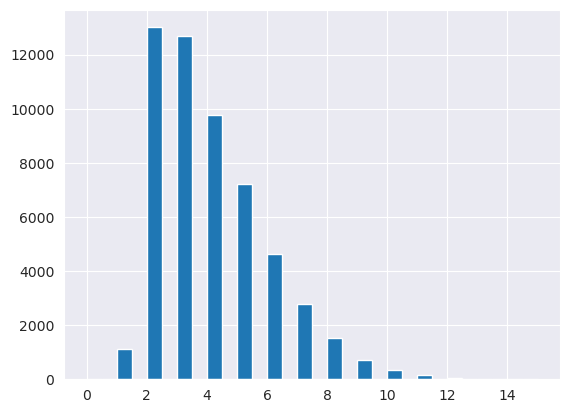

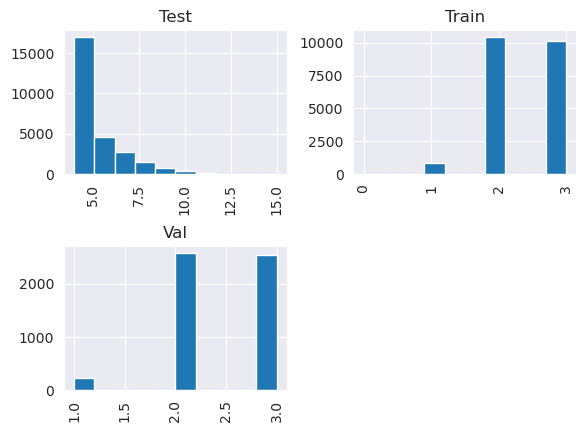

In [9]:
df_plot['num_mutations'].hist(bins=30)
df_plot['num_mutations'].hist(by=df_plot['cat'])

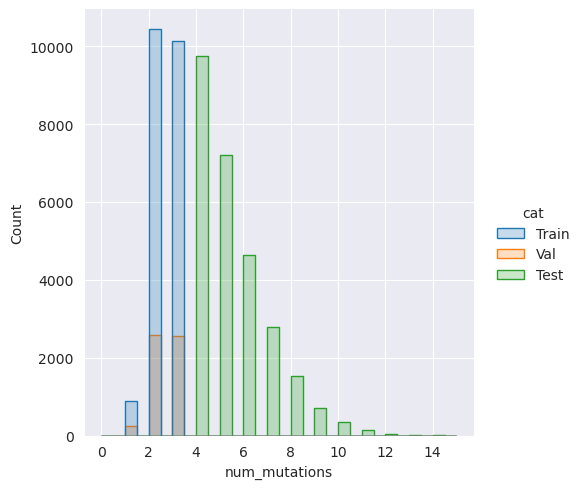

In [10]:
sns.displot(df_plot, x="num_mutations", hue="cat", element="step", bins=30)

In [11]:
# prepare full data
df_fluorescence_full_data = pd.concat(
    [df_fluorescence_train, df_fluorescence_val, df_fluorescence_test],
    ignore_index=True
)
df_fluorescence_full_data['log_fluorescence'] = df_fluorescence_full_data['log_fluorescence'].apply(lambda item: item[0])

# save file
df_fluorescence_full_data.to_csv(
    fluorescence_full_data_file,
    index=False
)
del df_fluorescence_full_data

In [12]:
df_fluorescence_full_data = pd.read_csv(fluorescence_full_data_file)
df_fluorescence_full_data.head()

,primary,protein_length,log_fluorescence,num_mutations,id
0,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,3.823701,2,0
1,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,3.752084,2,1
2,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,3.540156,2,2
3,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,3.691572,2,3
4,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,237,3.688143,3,4


### one-vs-many

In [13]:
# find train+val set
df_fluorescence_split_data_one_vs_many_train_and_val = df_fluorescence_full_data[
    df_fluorescence_full_data['num_mutations'] < 2
].reset_index(drop=True)

# select train/val by index
indices = np.random.permutation(df_fluorescence_split_data_one_vs_many_train_and_val.shape[0])
train_idx = indices[:int(df_fluorescence_split_data_one_vs_many_train_and_val.shape[0]*0.9)]
val_idx = indices[int(df_fluorescence_split_data_one_vs_many_train_and_val.shape[0]*0.9):]

df_fluorescence_split_data_one_vs_many_train = df_fluorescence_split_data_one_vs_many_train_and_val.iloc[train_idx].reset_index(drop=True)
df_fluorescence_split_data_one_vs_many_val = df_fluorescence_split_data_one_vs_many_train_and_val.iloc[val_idx].reset_index(drop=True)

# find test set
df_fluorescence_split_data_one_vs_many_test = df_fluorescence_full_data[
    df_fluorescence_full_data['num_mutations'] >= 2
].reset_index(drop=True)

df_fluorescence_split_data_one_vs_many_train['set'] = 'train'
df_fluorescence_split_data_one_vs_many_train['validation'] = False
df_fluorescence_split_data_one_vs_many_val['set'] = 'train'
df_fluorescence_split_data_one_vs_many_val['validation'] = True
df_fluorescence_split_data_one_vs_many_test['set'] = 'test'
df_fluorescence_split_data_one_vs_many_test['validation'] = False

df_fluorescence_split_data_one_vs_many = pd.concat(
    [df_fluorescence_split_data_one_vs_many_train,
     df_fluorescence_split_data_one_vs_many_val,
     df_fluorescence_split_data_one_vs_many_test],
    axis=0, ignore_index=True
).reset_index(drop=True)

# save file
df_fluorescence_split_data_one_vs_many.to_csv(
    fluorescence_split_data_one_vs_many_file,
    index=False
)

del df_fluorescence_split_data_one_vs_many_train_and_val
del df_fluorescence_split_data_one_vs_many_train
del df_fluorescence_split_data_one_vs_many_val
del df_fluorescence_split_data_one_vs_many_test
del df_fluorescence_split_data_one_vs_many

In [14]:
df_fluorescence_split_data_one_vs_many = pd.read_csv(fluorescence_split_data_one_vs_many_file)
num_val = df_fluorescence_split_data_one_vs_many['validation'].sum()
num_train = df_fluorescence_split_data_one_vs_many.set.value_counts()['train'] - num_val
num_test = df_fluorescence_split_data_one_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('one-many', num_all, num_train, num_val, num_test)

one-many 54025 1003 112 52910


### two-vs-many

In [15]:
# find train+val set
df_fluorescence_split_data_two_vs_many_train_and_val = df_fluorescence_full_data[
    df_fluorescence_full_data['num_mutations'] < 3
].reset_index(drop=True)

# select train/val by index
indices = np.random.permutation(df_fluorescence_split_data_two_vs_many_train_and_val.shape[0])
train_idx = indices[:int(df_fluorescence_split_data_two_vs_many_train_and_val.shape[0]*0.9)]
val_idx = indices[int(df_fluorescence_split_data_two_vs_many_train_and_val.shape[0]*0.9):]

df_fluorescence_split_data_two_vs_many_train = df_fluorescence_split_data_two_vs_many_train_and_val.iloc[train_idx].reset_index(drop=True)
df_fluorescence_split_data_two_vs_many_val = df_fluorescence_split_data_two_vs_many_train_and_val.iloc[val_idx].reset_index(drop=True)

# find test set
df_fluorescence_split_data_two_vs_many_test = df_fluorescence_full_data[
    df_fluorescence_full_data['num_mutations'] >= 3
].reset_index(drop=True)

df_fluorescence_split_data_two_vs_many_train['set'] = 'train'
df_fluorescence_split_data_two_vs_many_train['validation'] = False
df_fluorescence_split_data_two_vs_many_val['set'] = 'train'
df_fluorescence_split_data_two_vs_many_val['validation'] = True
df_fluorescence_split_data_two_vs_many_test['set'] = 'test'
df_fluorescence_split_data_two_vs_many_test['validation'] = False

df_fluorescence_split_data_two_vs_many = pd.concat(
    [df_fluorescence_split_data_two_vs_many_train,
     df_fluorescence_split_data_two_vs_many_val,
     df_fluorescence_split_data_two_vs_many_test],
    axis=0, ignore_index=True
).reset_index(drop=True)

# save file
df_fluorescence_split_data_two_vs_many.to_csv(
    fluorescence_split_data_two_vs_many_file,
    index=False
)

del df_fluorescence_split_data_two_vs_many_train_and_val
del df_fluorescence_split_data_two_vs_many_train
del df_fluorescence_split_data_two_vs_many_val
del df_fluorescence_split_data_two_vs_many_test
del df_fluorescence_split_data_two_vs_many

In [16]:
df_fluorescence_split_data_two_vs_many = pd.read_csv(fluorescence_split_data_two_vs_many_file)
num_val = df_fluorescence_split_data_two_vs_many['validation'].sum()
num_train = df_fluorescence_split_data_two_vs_many.set.value_counts()['train'] - num_val
num_test = df_fluorescence_split_data_two_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('two-many', num_all, num_train, num_val, num_test)

two-many 54025 12712 1413 39900


### three-vs-many

In [17]:
df_fluorescence_train['set'] = 'train'
df_fluorescence_train['validation'] = False
df_fluorescence_val['set'] = 'train'
df_fluorescence_val['validation'] = True
df_fluorescence_test['set'] = 'test'
df_fluorescence_test['validation'] = False

df_fluorescence_split_data_three_vs_many = pd.concat(
    [df_fluorescence_train,
     df_fluorescence_val,
     df_fluorescence_test],
    axis=0, ignore_index=True
).reset_index(drop=True)

df_fluorescence_split_data_three_vs_many['log_fluorescence'] = df_fluorescence_split_data_three_vs_many['log_fluorescence'].apply(lambda item: item[0])

# save file
df_fluorescence_split_data_three_vs_many.to_csv(
    fluorescence_split_data_three_vs_many_file,
    index=False
)

del df_fluorescence_train
del df_fluorescence_val
del df_fluorescence_test
del df_fluorescence_split_data_three_vs_many

In [18]:
df_fluorescence_split_data_three_vs_many = pd.read_csv(fluorescence_split_data_three_vs_many_file)
num_val = df_fluorescence_split_data_three_vs_many['validation'].sum()
num_train = df_fluorescence_split_data_three_vs_many.set.value_counts()['train'] - num_val
num_test = df_fluorescence_split_data_three_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('three-many', num_all, num_train, num_val, num_test)

three-many 54025 21446 5362 27217


## seven-vs-many

In [19]:
# find train+val set
df_fluorescence_split_data_seven_vs_many_train_and_val = df_fluorescence_full_data[
    df_fluorescence_full_data['num_mutations'] < 8
].reset_index(drop=True)

# select train/val by index
indices = np.random.permutation(df_fluorescence_split_data_seven_vs_many_train_and_val.shape[0])
train_idx = indices[:int(df_fluorescence_split_data_seven_vs_many_train_and_val.shape[0]*0.9)]
val_idx = indices[int(df_fluorescence_split_data_seven_vs_many_train_and_val.shape[0]*0.9):]

df_fluorescence_split_data_seven_vs_many_train = df_fluorescence_split_data_seven_vs_many_train_and_val.iloc[train_idx].reset_index(drop=True)
df_fluorescence_split_data_seven_vs_many_val = df_fluorescence_split_data_seven_vs_many_train_and_val.iloc[val_idx].reset_index(drop=True)

# find test set
df_fluorescence_split_data_seven_vs_many_test = df_fluorescence_full_data[
    df_fluorescence_full_data['num_mutations'] >= 8
].reset_index(drop=True)

df_fluorescence_split_data_seven_vs_many_train['set'] = 'train'
df_fluorescence_split_data_seven_vs_many_train['validation'] = False
df_fluorescence_split_data_seven_vs_many_val['set'] = 'train'
df_fluorescence_split_data_seven_vs_many_val['validation'] = True
df_fluorescence_split_data_seven_vs_many_test['set'] = 'test'
df_fluorescence_split_data_seven_vs_many_test['validation'] = False

df_fluorescence_split_data_seven_vs_many = pd.concat(
    [df_fluorescence_split_data_seven_vs_many_train,
     df_fluorescence_split_data_seven_vs_many_val,
     df_fluorescence_split_data_seven_vs_many_test],
    axis=0, ignore_index=True
).reset_index(drop=True)

# save file
df_fluorescence_split_data_seven_vs_many.to_csv(
    fluorescence_split_data_seven_vs_many_file,
    index=False
)

del df_fluorescence_split_data_seven_vs_many_train_and_val
del df_fluorescence_split_data_seven_vs_many_train
del df_fluorescence_split_data_seven_vs_many_val
del df_fluorescence_split_data_seven_vs_many_test
del df_fluorescence_split_data_seven_vs_many

In [20]:
df_fluorescence_split_data_seven_vs_many = pd.read_csv(fluorescence_split_data_seven_vs_many_file)
num_val = df_fluorescence_split_data_seven_vs_many['validation'].sum()
num_train = df_fluorescence_split_data_seven_vs_many.set.value_counts()['train'] - num_val
num_test = df_fluorescence_split_data_seven_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('three-many', num_all, num_train, num_val, num_test)

three-many 54025 46087 5121 2817


### low-vs-high

In [21]:
fluorescence_reference_seq_log_fluorescence = df_fluorescence_full_data[df_fluorescence_full_data['num_mutations'] == 0]['log_fluorescence'].to_list()[0]

In [22]:
# find train+val set
df_fluorescence_split_data_low_vs_high_train_and_val = df_fluorescence_full_data[
    df_fluorescence_full_data['log_fluorescence'] <= fluorescence_reference_seq_log_fluorescence
].reset_index(drop=True)

# select train/val by index
indices = np.random.permutation(df_fluorescence_split_data_low_vs_high_train_and_val.shape[0])
train_idx = indices[:int(df_fluorescence_split_data_low_vs_high_train_and_val.shape[0]*0.9)]
val_idx = indices[int(df_fluorescence_split_data_low_vs_high_train_and_val.shape[0]*0.9):]

df_fluorescence_split_data_low_vs_high_train = df_fluorescence_split_data_low_vs_high_train_and_val.iloc[train_idx].reset_index(drop=True)
df_fluorescence_split_data_low_vs_high_val = df_fluorescence_split_data_low_vs_high_train_and_val.iloc[val_idx].reset_index(drop=True)

# find test set
df_fluorescence_split_data_low_vs_high_test = df_fluorescence_full_data[
    df_fluorescence_full_data['log_fluorescence'] > fluorescence_reference_seq_log_fluorescence
].reset_index(drop=True)

df_fluorescence_split_data_low_vs_high_train['set'] = 'train'
df_fluorescence_split_data_low_vs_high_train['validation'] = False
df_fluorescence_split_data_low_vs_high_val['set'] = 'train'
df_fluorescence_split_data_low_vs_high_val['validation'] = True
df_fluorescence_split_data_low_vs_high_test['set'] = 'test'
df_fluorescence_split_data_low_vs_high_test['validation'] = False

df_fluorescence_split_data_low_vs_high = pd.concat(
    [df_fluorescence_split_data_low_vs_high_train,
     df_fluorescence_split_data_low_vs_high_val,
     df_fluorescence_split_data_low_vs_high_test],
    axis=0, ignore_index=True
).reset_index(drop=True)

# save file
df_fluorescence_split_data_low_vs_high.to_csv(
    fluorescence_split_data_low_vs_high_file,
    index=False
)

del df_fluorescence_split_data_low_vs_high_train_and_val
del df_fluorescence_split_data_low_vs_high_train
del df_fluorescence_split_data_low_vs_high_val
del df_fluorescence_split_data_low_vs_high_test
del df_fluorescence_split_data_low_vs_high

In [23]:
df_fluorescence_split_data_low_vs_high = pd.read_csv(fluorescence_split_data_low_vs_high_file)
num_val = df_fluorescence_split_data_low_vs_high['validation'].sum()
num_train = df_fluorescence_split_data_low_vs_high.set.value_counts()['train'] - num_val
num_test = df_fluorescence_split_data_low_vs_high.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('low-high', num_all, num_train, num_val, num_test)

low-high 54025 44082 4899 5044


### sampled

In [24]:
# select train/val/test by index
indices = np.random.permutation(df_fluorescence_full_data.shape[0])
train_val_idx = indices[:int(df_fluorescence_full_data.shape[0]*0.8)]
test_idx = indices[int(df_fluorescence_full_data.shape[0]*0.8):]
train_idx = train_val_idx[:int(train_val_idx.shape[0]*0.9)]
val_idx = train_val_idx[int(train_val_idx.shape[0]*0.9):]

df_fluorescence_split_data_sampled_train = df_fluorescence_full_data.iloc[train_idx].reset_index(drop=True)
df_fluorescence_split_data_sampled_val = df_fluorescence_full_data.iloc[val_idx].reset_index(drop=True)
df_fluorescence_split_data_sampled_test = df_fluorescence_full_data.iloc[test_idx].reset_index(drop=True)

df_fluorescence_split_data_sampled_train['set'] = 'train'
df_fluorescence_split_data_sampled_train['validation'] = False
df_fluorescence_split_data_sampled_val['set'] = 'train'
df_fluorescence_split_data_sampled_val['validation'] = True
df_fluorescence_split_data_sampled_test['set'] = 'test'
df_fluorescence_split_data_sampled_test['validation'] = False

df_fluorescence_split_data_sampled = pd.concat(
    [df_fluorescence_split_data_sampled_train,
     df_fluorescence_split_data_sampled_val,
     df_fluorescence_split_data_sampled_test],
    axis=0, ignore_index=True
).reset_index(drop=True)

# save file
df_fluorescence_split_data_sampled.to_csv(
    fluorescence_split_data_sampled_file,
    index=False
)

del df_fluorescence_split_data_sampled_train
del df_fluorescence_split_data_sampled_val
del df_fluorescence_split_data_sampled_test
del df_fluorescence_split_data_sampled

In [25]:
df_fluorescence_split_data_sampled = pd.read_csv(fluorescence_split_data_sampled_file)
num_val = df_fluorescence_split_data_sampled['validation'].sum()
num_train = df_fluorescence_split_data_sampled.set.value_counts()['train'] - num_val
num_test = df_fluorescence_split_data_sampled.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('sampled', num_all, num_train, num_val, num_test)

sampled 54025 38898 4322 10805
